## Assignment -PCA
Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


In [4]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.cluster import KMeans
import seaborn as sns

In [5]:
wine=pd.read_csv("c:/users/mahesh/datasetcsv/wine.csv")

In [6]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
wine1=wine.iloc[:,1:]

In [8]:
wine1.dtypes

Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [9]:

# Converting into numpy array
wyne=wine1.values
wyne

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [10]:
# Normalizing the numerical data 
wine_normal = scale(wyne)

In [11]:
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [12]:
normal=pd.DataFrame(wine_normal)

In [13]:
normal

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [14]:
pca = PCA(n_components = 12)
pca_values = pca.fit_transform(wine_normal)

In [15]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233])

In [16]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([36.2 , 55.41, 66.53, 73.6 , 80.16, 85.1 , 89.34, 92.02, 94.24,
       96.17, 97.91, 99.21])

In [17]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

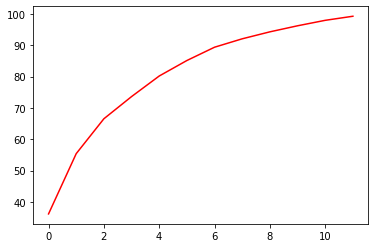

In [18]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

([<matplotlib.axis.XTick at 0xc9d8610>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

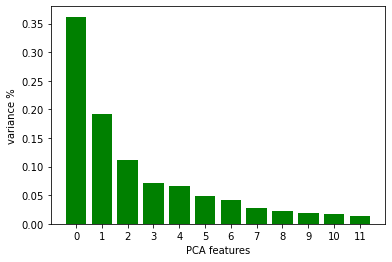

In [19]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='green')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [20]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(pca_values)

In [21]:
 pca_values
    

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
         1.02095585e+00, -4.51563395e-01,  5.40810414e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
         1.59701372e-01, -1.42657306e-01,  3.88237741e-01],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
         1.13360857e-01, -2.86672847e-01,  5.83573183e-04],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
        -2.47997312e-01,  5.12492025e-01,  6.98766451e-01],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         4.91489502e-01,  2.99821968e-01,  3.39820654e-01],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -1.17969019e-01, -2.29964331e-01, -1.88787963e-01]])

In [22]:
    m=0
    n=1
    for i in range(2):
        pc= pca_values[:,m:n]
        m=m+1
        n=n+1
        pc1[m]=pd.DataFrame(pc)
    i=i+1
        


NameError: name 'pc1' is not defined

In [ ]:
pc1

In [ ]:
pc1.isnull().sum()

In [ ]:

con=wine.iloc[:,0:1]

In [ ]:
pc1.shape

In [ ]:
final_df=pd.concat([con,pc1],join='outer', axis=1)

In [ ]:
final_df

In [ ]:
final=final_df

In [ ]:
final

In [ ]:
final_df = final_df.rename(columns={0: 'pc-1', 1: 'pc-2',2: 'pc-3'})

In [ ]:
final_df

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,30))
n=0
m=2
for i in enumerate(final_df.columns):   
    plt.subplot(3,2,i[0]+1)
    cr=final_df.columns
    sns.scatterplot(x=cr[n],y=cr[m], hue='Type', 
    data=final_df, palette='dark', s=20);
    plt.legend(loc='lower right');
    plt.legend(loc='lower right');
    n=n+1
    m=m-1

# Find the Clusters Kmeans

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
final_df

In [ ]:
sns.scatterplot(x=final_df['pc-1'],y=final_df['pc-2'], hue="Type", 
    data=km, palette='deep', s=20);

In [ ]:
km=final_df.iloc[:,1:4]

In [ ]:
km

# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(km)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(km)

In [ ]:
clusters_new.labels_

In [ ]:
#Assign clusters to the data set
km['clusterid_new'] = clusters_new.labels_

In [ ]:
km

In [ ]:
km.sort_values(by=["clusterid_new"]) 

In [ ]:
km.groupby('clusterid_new').agg(['mean']).reset_index()

In [ ]:
plt.figure(figsize=(15,30))
n=0
m=3
for i in enumerate(km.columns):
        
    plt.subplot(4,1,i[0]+1)
    cr=km.columns
    sns.scatterplot(x=cr[n],y=cr[m], hue="clusterid_new", 
    data=km, palette='deep', s=20);
    plt.legend(loc='lower right');
    plt.legend(loc='lower right');
    n=n+1
    m=m-1

# Hirerchical modeling 

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# create dendrogram
plt.figure(figsize=(15,15))
dendrogram = sch.dendrogram(sch.linkage(normal, method='single'))

In [ ]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')

In [ ]:
# save clusters for chart
y_hc = hc.fit_predict(normal)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [ ]:
normal['Cluster']=Clusters

In [ ]:
normal